In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

In [2]:
def plot_hist(x, name):
    plt.hist(x, bins=20, color='c', edgecolor='k', alpha=0.65)
    plt.axvline(x.mean(), color='k', linestyle='dashed', linewidth=1)
    min_ylim, max_ylim = plt.ylim()
    plt.text(x.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(x.mean()))
    plt.xlabel(name)
    plt.show()

### Step 1: Simulation to calculate Errors u1 = u2

In [3]:
n1 = 23
n2 = 27
u1 = 0
u2 = 0
SSW = []
SSB = []

for _ in range(1001):
    
    # Generate Random Error
    ei = np.random.normal(loc = 0.0, scale = 1.0, size = (50,1))

    # Calculate Groups means
    y_i1 = u1 + ei[:n1] # Group 1
    y_i2 = u2 + ei[n1:] # Group 2
    y_ij = np.vstack([y_i1, y_i2])

    # Calculate Error
    y_bar = np.mean(y_ij) 
    y1_bar = np.mean(y_i1) 
    y2_bar = np.mean(y_i2)
    
    # Calculate Variabilit WITHIN and BETWEEN Groups
    SSW_iter = np.sum((y_i1 - y1_bar )**2) + np.sum((y_i2 - y2_bar )**2)
    SSB_iter = n1*(y1_bar - y_bar)**2 + n2*(y2_bar - y_bar)**2
    
    
    SSW.append(SSW_iter)
    SSB.append(SSB_iter)   

SSW = np.array(SSW)
SSB = np.array(SSB)

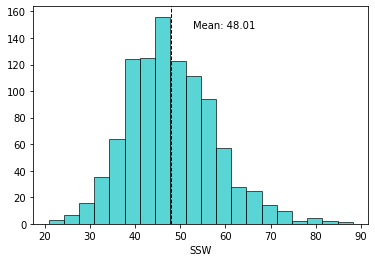

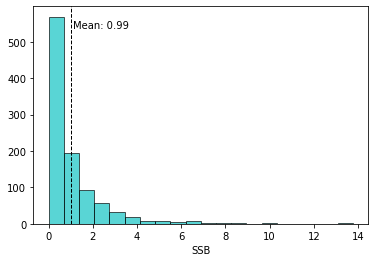

In [4]:
plot_hist(SSW, 'SSW')
plot_hist(SSB, 'SSB')

### Step 2: Calculate Correlation

HandCalc

In [5]:
cov_matrix = np.cov(SSW, SSB)
cov_matrix

array([[94.5111584 ,  0.21879183],
       [ 0.21879183,  1.94852194]])

In [6]:
cov_matrix[0,1] / (np.sqrt(cov_matrix[0,0]) * (np.sqrt(cov_matrix[1,1])))

0.01612266797126064

Numpy Func

In [7]:
np.corrcoef(SSW, SSB)

array([[1.        , 0.01612267],
       [0.01612267, 1.        ]])

### Step 3: F Statistic

In [8]:
k = 2
n = 50
test_stat_F = (np.mean(SSB)/(k-1)) / (np.mean(SSW)/(n-k))
print('F statistic: ',test_stat_F)

F statistic:  0.993174995475591


In [9]:
p_value = f.sf(test_stat_F, k-1, n-k)
print('p_value: ', p_value)

p_value:  0.32396521222332675


In [10]:
F_reject = f.isf(0.05, 1, 48, loc=0, scale=1)
print('F statistic to reject (@ alpha=0.05): ', F_reject)

F statistic to reject (@ alpha=0.05):  4.042652128566653


-------------------

### Step 1: Simulation to calculate Errors u1 = 0 & u2 = 2

In [11]:
n1 = 23
n2 = 27
u1 = 0
u2 = 2
SSW = []
SSB = []

for _ in range(1001):
    
    # Generate Random Error
    ei = np.random.normal(loc = 0.0, scale = 1.0, size = (50,1))

    # Calculate Groups means
    y_i1 = u1 + ei[:n1] # Group 1
    y_i2 = u2 + ei[n1:] # Group 2
    y_ij = np.vstack([y_i1, y_i2])

    # Calculate Error
    y_bar = np.mean(y_ij) 
    y1_bar = np.mean(y_i1) 
    y2_bar = np.mean(y_i2)
    
    # Calculate Variabilit WITHIN and BETWEEN Groups
    SSW_iter = np.sum((y_i1 - y1_bar )**2) + np.sum((y_i2 - y2_bar )**2)
    SSB_iter = n1*(y1_bar - y_bar)**2 + n2*(y2_bar - y_bar)**2
    
    
    SSW.append(SSW_iter)
    SSB.append(SSB_iter)   

SSW = np.array(SSW)
SSB = np.array(SSB)

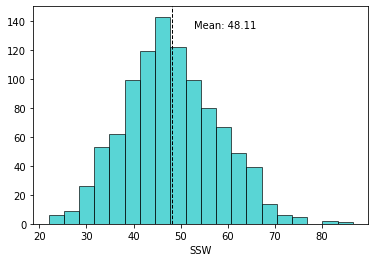

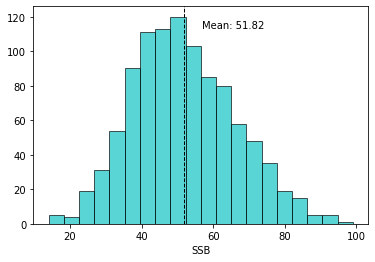

In [12]:
plot_hist(SSW, 'SSW')
plot_hist(SSB, 'SSB')

### Step 2: Calculate Correlation

HandCalc

In [13]:
cov_matrix = np.cov(SSW, SSB)
cov_matrix

array([[100.18144261,  -3.61025015],
       [ -3.61025015, 206.16502318]])

In [14]:
cov_matrix[0,1] / (np.sqrt(cov_matrix[0,0]) * (np.sqrt(cov_matrix[1,1])))

-0.025120955847629634

Numpy Func

In [15]:
np.corrcoef(SSW, SSB)

array([[ 1.        , -0.02512096],
       [-0.02512096,  1.        ]])

### Step 3: F Statistic

In [16]:
k = 2
n = 50
test_stat_F = (np.mean(SSB)/(k-1)) / (np.mean(SSW)/(n-k))
print('F statistic: ',test_stat_F)

F statistic:  51.69514616300362


In [17]:
p_value = f.sf(test_stat_F, k-1, n-k)
print('p_value: ', p_value)

p_value:  3.763122002372791e-09


In [18]:
F_reject = f.isf(0.05, 1, 48, loc=0, scale=1)
print('F statistic to reject (@ alpha=0.05): ', F_reject)

F statistic to reject (@ alpha=0.05):  4.042652128566653


### Step 1: Simulation to calculate Errors u1 - 0 & u2 = 0.5

In [19]:
n1 = 23
n2 = 27
u1 = 0
u2 = 0.5
SSW = []
SSB = []

for _ in range(1001):
    
    # Generate Random Error
    ei = np.random.normal(loc = 0.0, scale = 1.0, size = (50,1))

    # Calculate Groups means
    y_i1 = u1 + ei[:n1] # Group 1
    y_i2 = u2 + ei[n1:] # Group 2
    y_ij = np.vstack([y_i1, y_i2])

    # Calculate Error
    y_bar = np.mean(y_ij) 
    y1_bar = np.mean(y_i1) 
    y2_bar = np.mean(y_i2)
    
    # Calculate Variabilit WITHIN and BETWEEN Groups
    SSW_iter = np.sum((y_i1 - y1_bar )**2) + np.sum((y_i2 - y2_bar )**2)
    SSB_iter = n1*(y1_bar - y_bar)**2 + n2*(y2_bar - y_bar)**2
    
    
    SSW.append(SSW_iter)
    SSB.append(SSB_iter)   

SSW = np.array(SSW)
SSB = np.array(SSB)

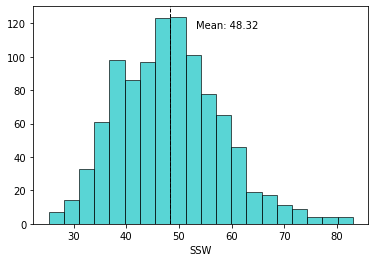

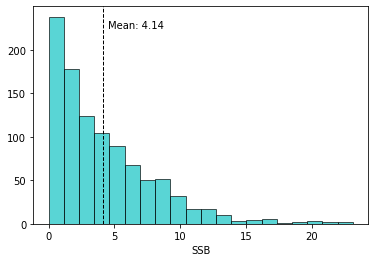

In [20]:
plot_hist(SSW, 'SSW')
plot_hist(SSB, 'SSB')

### Step 2: Calculate Correlation

HandCalc

In [21]:
cov_matrix = np.cov(SSW, SSB)
cov_matrix

array([[97.37942857,  1.32678203],
       [ 1.32678203, 14.82111161]])

In [22]:
cov_matrix[0,1] / (np.sqrt(cov_matrix[0,0]) * (np.sqrt(cov_matrix[1,1])))

0.03492412870207667

Numpy Func

In [23]:
np.corrcoef(SSW, SSB)

array([[1.        , 0.03492413],
       [0.03492413, 1.        ]])

### Step 3: F Statistic

In [24]:
k = 2
n = 50
test_stat_F = (np.mean(SSB)/(k-1)) / (np.mean(SSW)/(n-k))
print('F statistic: ',test_stat_F)

F statistic:  4.107971701194723


In [25]:
p_value = f.sf(test_stat_F, k-1, n-k)
print('p_value: ', p_value)

p_value:  0.048255903016682436


In [26]:
F_reject = f.isf(0.05, 1, 48, loc=0, scale=1)
print('F statistic to reject (@ alpha=0.05): ', F_reject)

F statistic to reject (@ alpha=0.05):  4.042652128566653


# Multiple Regression Setting

In [51]:
ei = np.random.normal(loc = 0.0, scale = 1.0, size = (50,1))

In [52]:
X = np.zeros(shape=(50,2))
X[:23,0] = 1
X[23:,1] = 1
u = np.array([ 0 , 2]).reshape(2,1)
y_i = X @ u + ei

In [53]:
y_i.shape

(50, 1)

In [54]:
X.T @ X

array([[23.,  0.],
       [ 0., 27.]])

In [55]:
u_hat = np.linalg.inv(X.T @ X) @ X.T @ y_i
u_hat

array([[0.13708731],
       [1.86921461]])

In [57]:
# Check
print(np.mean(y_i[:23]))
print(np.mean(y_i[23:]))

0.1370873076937937
1.8692146076972922
